# CO2 concentration time series

## Fitting trends and seasonal cycle

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
data=np.loadtxt("../data/co2_mm_mlo.csv",\
                skiprows=2,delimiter=",")
time=data[:,2]
co2=data[:,4] # use the interpolated data curve
 

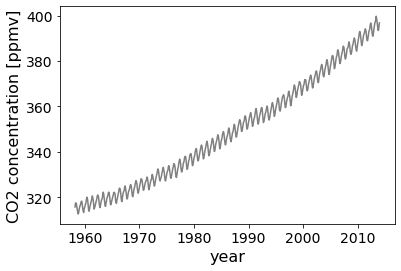

In [3]:
plt.plot(time,co2,'gray')
plt.xlabel('year',fontsize=16)
plt.ylabel('CO2 concentration [ppmv]',fontsize=16)
res=plt.yticks(fontsize=14)
res=plt.xticks(fontsize=14)

In [4]:
# Applying the scipy function linregress

In [5]:
x=time
y=co2
b,a,pvalue,r, serr=linregress(x,y)

print("Linear regression line:")
print("Standard textbook symbols")
print(f"y = a + bx  = {a :.3f} + {b :.3f}*x" )



print('=====================================================')
print('Physical world: Equation with proper variable names' )
print('----------------------------------------------------') 
print(f"CO2 = {a :.3f} +  {b :.3f}*year")
print('=====================================================')


print(f"p value: {pvalue :.4f}")

Linear regression line:
Standard textbook symbols
y = a + bx  = -2596.534 + 1.483*x
Physical world: Equation with proper variable names
----------------------------------------------------
CO2 = -2596.534 +  1.483*year
p value: 0.9891


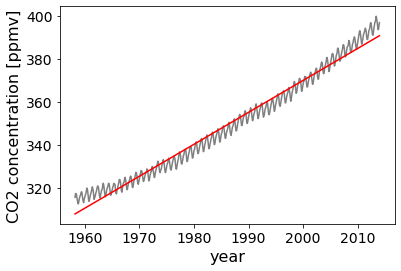

In [6]:
# fitted line and residuals
trend=a+b*x
resid=y-trend
x2=x-np.mean(x)

plt.plot(time,co2,'gray')
plt.plot(time,trend,color='red')
plt.xlabel('year',fontsize=16)
plt.ylabel('CO2 concentration [ppmv]',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()


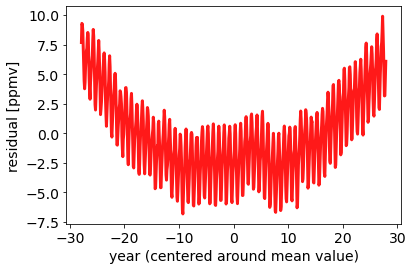

In [33]:
plt.plot(x2,resid,color='red',linewidth=3,alpha=0.9)
plt.xlabel("year (centered around mean value)",fontsize=14)
plt.ylabel("residual [ppmv]",fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()


### Fitting a quadratic function 

In this example we can fit just the $y=b*x^2$ 
with x being the centered years.



LinregressResult(slope=0.0120592484514517, intercept=-3.1327455899842533, rvalue=0.7886176824954655, pvalue=3.2056199996662747e-143, stderr=0.00036379656022967434)


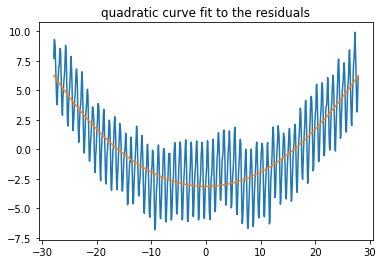

In [9]:
xnew=x2**2
#plt.plot(xnew,resid,'o')
#plt.show()

# alternative way to collect the returned values
fit2=linregress(xnew,resid)
print(fit2)

yfit2=fit2.intercept+fit2.slope*xnew

plt.plot(x2,resid)
plt.plot(x2,yfit2)
plt.title("quadratic curve fit to the residuals")
plt.show()

[ 1.20592485e-02 -4.64180711e+01  4.49683649e+04]


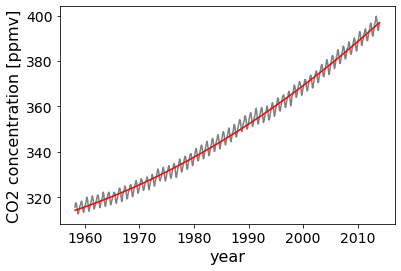

In [28]:
coeff=np.polyfit(time,co2,2) # returns the coefficients for highest exponent first
co2fit=coeff[0]*time**2+coeff[1]*time +coeff[2]
print(coeff)
# this is how we can fit a polynomial function of degree 2
fit=np.poly1d(np.polyfit(x, y, 2))

plt.plot(time,co2,'gray')
plt.plot(time,fit(time),color='red')
plt.xlabel('year',fontsize=16)
plt.ylabel('CO2 concentration [ppmv]',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()
resid_from_polyfit=co2-fit(time)


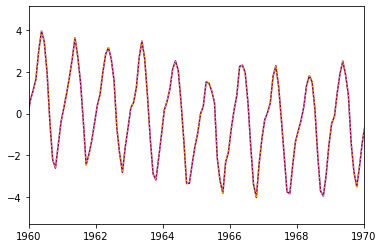

In [33]:
############################################################
# periodic signals
############################################################

##########################################################################
# fitting the seasonal cycle
# we use the numpy linear algebra package for least squares fit
# this time
##########################################################################
residual2=resid-yfit2

T=1.0
pi=np.pi
xc=np.cos(2*pi/T*time)
xs=np.sin(2*pi/T*time)
fig3=plt.figure(3)
#plt.plot(time,xc)
#plt.plot(time,xs)
plt.plot(time,residual2,color='purple')
plt.plot(time,resid_from_polyfit,':',color='orange')
plt.xlim([1960,1970])
plt.show()

### Fitting a pair of cosine and sine functions:


(670, 2)
[-1.02802693  2.61227162]
(670,)


<ipython-input-54-f038097c44aa>:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  res= np.linalg.lstsq(X,residual2)


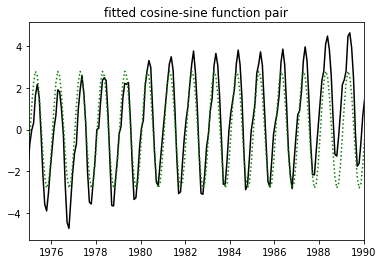

In [54]:
X=np.empty(shape=[len(xc),2]) # putting the two arrays with cosine and sine together into 2-d array
X[:,0]=xc # insert cosine data in column 0
X[:,1]=xs # insert sine data in column 1
print(X.shape)
# we need the cosine and sine data in column, however.

res= np.linalg.lstsq(X,residual2)
coeffs=res[0]
print(coeffs)
# dot product between n x 2 matrix and vector of size 2 yields a n x 1 matrix (1-d array)
cycle=np.dot(X,coeffs)
print(cycle.shape)
plt.plot(time,residual2,color='black')
plt.plot(time,cycle,':',color='green')
plt.title("fitted cosine-sine function pair")
plt.xlim([1975,1990])
plt.show()


## Let's check visually if the residuals behave like random normally distributed errors

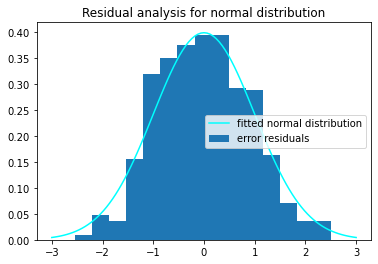

In [71]:
from scipy.stats import norm

residual3=residual2-cycle
fig4=plt.figure(4)
plt.hist(residual3,bins=15,label='error residuals',density=True)
plt.title("Residual analysis for normal distribution")
m,s = np.mean(residual3),np.std(residual3)
xhelp=np.linspace(-3,3,101)
plt.plot(xhelp,norm.pdf(xhelp),color='cyan',label='fitted normal distribution')
plt.legend()
plt.show()


Links:
    
- [Polynomial curve fitting](https://scipy-lectures.org/intro/numpy/auto_examples/plot_polyfit.html)

### Cosine and sine functions: trigonometric identities

$sin( \alpha +\beta) = \sin(\alpha)*cos(\beta) + cos(\alpha)* sin(\beta) $


Let $\alpha$ be the time variable in our case in form of 
$\alpha=2*\pi/T*time$, with T the period of the signal.

Then we see that $\beta$ can be interpreted as a phase shift.
So instead of fitting the amplitude and a phase-shift parameter for a sine-wave,
we fit the amplitudes of the cosine and sine functions in order to fit a periodic
signal in amplitude and phase.



In [70]:
##########################################################################
# fitting the seasonal cycle
# we use the numpy linear algebra package for least squares fit
# this time
##########################################################################
ones=np.ones(np.size(time))
X=np.hstack([ones,x,x**2,xc,xs])
res=np.linalg.lstsq(X.T,co2)
coeffs=res[0]
fit=np.dot(X.T,coeffs)
residuals=co2-fit
fig5= plt.figure(5)
plt.plot(time,co2)
plt.plot(time,fit)

LinAlgError: 1-dimensional array given. Array must be two-dimensional